Este colab fue desarrollado por Arnold Charry Armero

# Bank One

Cada hora desde las 10 a.m. a las 7 p.m., el Banco Uno recibe
cheques y debe procesarlos. Su objetivo es procesar todos los
cheques el mismo día en que se reciben. El banco tiene 13
máquinas procesadoras de cheques, cada una de las cuales puede procesar hasta
hasta 500 cheques por hora. Se necesita un trabajador para operar cada
máquina. Bank One contrata tanto a tiempo completo como a tiempo parcial
trabajadores. Los trabajadores de tiempo completo trabajan de 10 a. m. a 6 p. m., de 11 a. m. a
7 p. m. o del mediodía a las 8 p. m. y se les paga $\$160$ por día. Tiempo parcial
los trabajadores trabajan de 2 p. m. a 7 p. m. o de 3 p. m. a 8 p. m. y son
Pagaba $\$75$ por día. El número de cheques recibidos cada hora.
se muestra en la Tabla 6. En aras de mantener la continuidad,
Bank One cree que debe tener al menos tres empleados a tiempo completo
trabajadores bajo contrato. Desarrollar un trabajo que minimice costos.
horario que procesa todos los cheques antes de las 8 p.m.

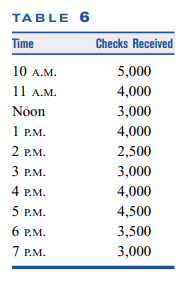

## Conjuntos


$ i = \text{Empleados que comienzan en la franja (hora) } i$

$ j = \text{Empleados que comienzan en la franja (hora) } j$

## Parámetros

$ D = \textrm{Demanda de cheques } $

$ P_{ij} = \textrm{1 si el trabajador de tiempo regular} i \textrm{ se encuentra disponible en el horario } j \textrm{, 0 lo contrario.}$

$ M_{ij} = \textrm{1 si el trabajador de tiempo extra} i \textrm{ se encuentra disponible en el horario } j \textrm{, 0 lo contrario.}$

$ CN = \textrm{Costo de un trabajador normal } $

$ CE = \textrm{Costo de un trabajador extra } $

$ MA = \textrm{Máquinas utilizadas para procesar cheques } $

$ C = \textrm{Máxima capacidad para procesar cheques } $

$ CP = \textrm{Capacidad de procesamiento para procesar cheques } $

$ H_{i} = \textrm{Horas que dura cada turno } $

## Variables de decisión

$ x_{i} = \textrm{Trabajadores que comienzan su empleo en jornada regular en la franja } i $

$ y_{i} = \textrm{Trabajadores que comienzan su empleo en jornada extra en la franja } i $

## Función objetivo

$$ \textrm{Min } z = \sum_{i = 1}^{n}CN\: x_{i} + \sum_{i = 1}^{n} CE\: y_{i} $$

## Restricciones

$$ \sum_{i = 1}^{n} H_{i} \: CP \: x_{i} + \sum_{i = 1}^{n} H_{i} \: CP \: y_{i} \geq D$$

$$ \sum_{i = 1}^{n} x_{i} + \sum_{i = 1}^{n} y_{i} \leq 13$$

$$\sum_{i = 1}^{n} x_{i} \geq 3 $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 27.1 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [15]:
#Conjuntos
trabajadores_regulares = range(3)
trabajadores_extra = range(2)

In [18]:
# Parámetros
D = 36500

CN = 160

CE = 75

CP = 500

H1 = 8

H2 = 5

In [19]:
# Crear la instancia del modelo
model = LpProblem(name="Bank_One", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (trabajadores_regulares), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (trabajadores_extra), 0, None, LpInteger)

#Función objetivo
model += lpSum([X[i] * CN for i in trabajadores_regulares]) + lpSum([Y[i] * CE for i in trabajadores_extra])

# Restricciones
model += lpSum([H1 * CP * X[i] for i in trabajadores_regulares]) + lpSum([H2 * CP * Y[i] for i in trabajadores_extra]) >= D

model += lpSum([X[i] for i in trabajadores_regulares]) >= 3

model += lpSum([X[i] for i in trabajadores_regulares]) + lpSum([Y[i] for i in trabajadores_extra]) <= 13

model += X[0] >= 1

model += X[2] >= 1


# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costo asociado = $", value(model.objective))

Status: Optimal
X_0 = 2.0
X_1 = 0.0
X_2 = 1.0
Y_0 = 10.0
Y_1 = 0.0
Costo asociado = $ 1230.0
